In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

le = preprocessing.LabelEncoder()

In [2]:
#loading the train and test dataset
train_df = pd.read_csv("NSL-KDD Dataset/KDDTrain+_20Percent.txt")
#train_df

test_df = pd.read_csv("KDDTest+.txt")
#test_df = pd.read_csv("NSL-KDD Dataset/KDDTest-21.txt")
#test_df

In [3]:
df = pd.concat([train_df,test_df])
#df.to_csv("test.csv")
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,severity_score
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
#Drop severity score column
df = df.drop(['severity_score'], axis = 1)

#assigning the numerical values to class  

new_df=df['class']

                                 
frame=new_df.replace({ 'normal' : 0, 'apache2': 1,'back':1, 'land': 1, 'neptune': 1, 
                                         'mailbomb': 1, 'pod': 1, 'processtable': 1, 'smurf': 1, 
                                         'teardrop': 1,'udpstorm': 1, 'worm': 1,'ipsweep' : 2,
                                         'mscan' : 2, 'nmap' : 2, 'portsweep' : 2,'satan' : 2,
                                         'saint' : 2, 'ftp_write': 3,'guess_passwd': 3,'imap': 3,
                                         'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3, 'warezmaster': 3,
                            'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3, 'xlock': 3,
                            'xsnoop': 3,'httptunnel': 3,'buffer_overflow': 4,'loadmodule': 4,'perl': 4,
                            'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

frame



0        0
1        0
2        1
3        0
4        0
        ..
22539    0
22540    0
22541    1
22542    0
22543    2
Name: class, Length: 47736, dtype: int64

In [5]:
df['class'] = frame
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,0
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,1
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0


In [6]:
#converting the categorical values into numerical values - protocol_type, service and flag 

df.protocol_type = le.fit_transform(df.protocol_type)
df.service = le.fit_transform(df.service)
df.flag = le.fit_transform(df.flag)

df.protocol_type = df.protocol_type.astype('category')
df.service = df.service.astype('category')
df.flag = df.flag.astype('category')

df.describe(include='all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,47736.000000,47736.0,47736.0,47736.0,4.773600e+04,4.773600e+04,47736.000000,47736.000000,47736.000000,47736.000000,...,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000
unique,NaN,3.0,67.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1.0,22.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,39406.0,15856.0,29848.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,264.347285,NaN,NaN,NaN,1.774954e+04,2.813757e+03,0.000189,0.016507,0.000356,0.154286,...,127.194319,0.561790,0.086317,0.140278,0.026080,0.197021,0.194640,0.172387,0.169733,0.748031
std,2178.505660,NaN,NaN,NaN,1.781220e+06,6.616178e+04,0.013730,0.213064,0.025481,1.690612,...,111.921285,0.444949,0.203750,0.307468,0.099666,0.385606,0.388126,0.351446,0.363230,0.891252
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,NaN,NaN,NaN,4.500000e+01,3.600000e+01,0.000000,0.000000,0.000000,0.000000,...,98.000000,0.760000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,NaN,NaN,NaN,2.840000e+02,5.990000e+02,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.040000,0.010000,0.020000,0.000000,0.020000,0.000000,1.000000


In [7]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,51,9,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,0
22540,0,1,22,9,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0
22541,0,1,22,9,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,1
22542,0,2,11,9,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0


In [8]:
X = df.drop(['class'], axis = 1)
Y = df['class']

In [9]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,19,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,41,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,46,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,22,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,22,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,51,9,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00
22540,0,1,22,9,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00
22541,0,1,22,9,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07
22542,0,2,11,9,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00


In [10]:
Y

0        0
1        0
2        1
3        0
4        0
        ..
22539    0
22540    0
22541    1
22542    0
22543    2
Name: class, Length: 47736, dtype: int64

In [11]:
#Spliting the KDDTrain+ csv file itself into train and test data


from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) # 80% training and 20% test

In [12]:
print('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (38188, 41) (38188,)
Test set: (9548, 41) (9548,)


In [13]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
8307,0,1,54,1,0,0,0,0,0,0,...,255,7,0.03,0.03,0.00,0.00,0.00,0.00,0.19,1.00
3884,0,1,46,5,0,0,0,0,0,0,...,255,19,0.07,0.09,0.00,0.00,1.00,1.00,0.00,0.00
19932,0,0,13,9,8,0,0,0,0,0,...,3,195,1.00,0.00,1.00,0.25,0.00,0.00,0.00,0.00
7832,0,2,41,9,1,0,0,0,0,0,...,255,2,0.01,0.20,1.00,0.00,0.00,0.00,0.00,0.00
4463,0,1,22,9,313,2042,0,0,0,0,...,174,255,1.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,0,1,46,5,0,0,0,0,0,0,...,255,5,0.02,0.07,0.00,0.00,1.00,1.00,0.00,0.00
20699,0,1,41,1,0,0,0,0,0,0,...,255,1,0.00,1.00,0.00,0.00,0.05,0.00,0.95,1.00
17421,0,2,46,9,105,146,0,0,0,0,...,255,253,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00
18375,10,1,57,9,119,2437,0,0,0,0,...,255,6,0.02,0.35,0.00,0.00,0.01,0.17,0.64,0.33


In [39]:
X_training=X[:25192]
#X_training
X_testing = X[25192:]
#X_testing
Y_training = Y[:25192]
#Y_training
Y_testing = Y[25192:]
#Y_testing


In [40]:
print('Train set:', X_training.shape,  Y_training.shape)
print ('Test set:', X_testing.shape,  Y_testing.shape)

Train set: (25192, 41) (25192,)
Test set: (22544, 41) (22544,)


In [41]:
X_training

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,19,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,41,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,46,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,22,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,22,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,16,2,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
25188,0,1,19,9,334,0,0,0,0,0,...,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
25189,0,1,46,1,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
25190,0,1,38,5,0,0,0,0,0,0,...,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [42]:
Y_training

0        0
1        0
2        1
3        0
4        0
        ..
25187    1
25188    3
25189    1
25190    1
25191    1
Name: class, Length: 25192, dtype: int64

## Normalization using sklearn

In [43]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler


In [44]:
# fit scaler on training data
norm = MinMaxScaler().fit(X_training)
#norm = MinMaxScaler().fit(X_train)


In [45]:

# transform training data
X_training_norm = norm.transform(X_training)
#X_train_norm = norm.transform(X_train)

#transform testing dataabs
X_testing_norm = norm.transform(X_testing)
#X_test_norm = norm.transform(X_test)

In [46]:
X_training_norm
#X_train_norm

array([[0.        , 0.5       , 0.28787879, ..., 0.        , 0.05      ,
        0.        ],
       [0.        , 1.        , 0.62121212, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.6969697 , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.5       , 0.6969697 , ..., 0.        , 1.        ,
        1.        ],
       [0.        , 0.5       , 0.57575758, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.25757576, ..., 1.        , 0.        ,
        0.        ]])

In [47]:
X_testing_norm
#X_test_norm

array([[0.00000000e+00, 5.00000000e-01, 6.96969697e-01, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 5.00000000e-01, 6.96969697e-01, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [4.66613784e-05, 5.00000000e-01, 2.87878788e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 5.00000000e-01, 3.33333333e-01, ...,
        0.00000000e+00, 7.00000000e-02, 7.00000000e-02],
       [0.00000000e+00, 1.00000000e+00, 1.66666667e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.00000000e-01, 8.18181818e-01, ...,
        0.00000000e+00, 4.40000000e-01, 1.00000000e+00]])

In [48]:
#X_training_norm.describe()

## Standardization using sklearn 

In [49]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

In [50]:
# copy of datasets
X_training_stand = X_training.copy()
#X_train_stand = X_train.copy()

X_testing_stand = X_testing.copy()
#X_test_stand = X_test.copy()



In [51]:
# numerical features

num_cols = ['duration','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',
'num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
'dst_host_srv_rerror_rate']



In [52]:
# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_training_stand[[i]])
    #scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_training_stand[i] = scale.transform(X_training_stand[[i]])
    #X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_testing_stand[i] = scale.transform(X_testing_stand[[i]])
    #X_test_stand[i] = scale.transform(X_test_stand[[i]])
    

In [53]:
X_training_stand
#X_train_stand


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.113551,1,19,9,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,-0.113551,2,41,9,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,-0.113551,1,46,5,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,-0.113551,1,22,9,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,-0.113551,1,22,9,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,-0.113551,1,16,2,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25188,-0.113551,1,19,9,-0.009954,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.833807,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281
25189,-0.113551,1,46,1,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25190,-0.113551,1,38,5,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281


In [54]:
X_testing_stand
#X_test_stand


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.113551,1,46,1,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.949554,-1.068731,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
1,-0.113551,1,46,1,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-1.030895,-1.157831,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
2,-0.112806,1,19,9,-0.004707,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.490263,-0.262670,0.200940,-0.227251,1.500021,-0.107117,-0.641804,-0.627365,-0.385140,-0.374281
3,-0.113551,0,13,9,-0.010084,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.813603,-0.524770,1.069663,-0.440940,2.764775,2.244275,-0.641804,-0.627365,-0.385140,-0.374281
4,-0.113178,1,57,2,-0.010093,-0.039141,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.550955,-0.262670,-0.467308,0.467240,-0.380894,-0.107117,-0.641804,-0.627365,2.328492,1.863158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.113551,1,51,9,-0.009763,-0.035561,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.833725,0.234417,0.445965,-0.120406,-0.445754,-0.197555,-0.619348,-0.627365,-0.385140,-0.374281
22540,-0.113551,1,22,9,-0.009961,-0.028750,-0.00891,-0.091223,-0.006301,-0.091933,...,0.146153,1.264742,1.069663,-0.440940,-0.445754,-0.197555,-0.619348,-0.627365,-0.385140,-0.374281
22541,-0.113551,1,22,9,0.012531,0.054286,-0.00891,-0.091223,-0.006301,0.836503,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.156279,-0.153688
22542,-0.113551,2,11,9,-0.010075,-0.038837,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,1.237628,1.047388,-0.387518,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281


##  SVM  

In [55]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [56]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_training_stand, Y_training)
#rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_training_norm, Y_training)

#poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_training_stand, Y_training)

In [57]:
rbf_pred = rbf.predict(X_testing_stand)
#rbf_pred = rbf.predict(X_test_norm)

#poly_pred = poly.predict(X_testing_stand)

In [58]:
#metrics.accuracy_score(Y_testing,rbf_pred)
metrics.accuracy_score(Y_testing,rbf_pred)


0.7044002838892832

In [59]:
#metrics.precision_recall_fscore_support(Y_testing,rbf_pred, average='weighted')
metrics.precision_recall_fscore_support(Y_testing,rbf_pred, average='weighted')


c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8145625576997394, 0.7044002838892832, 0.6532169325233823, None)

In [178]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [179]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(Y_testing, rbf_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['normal','DOS','Probe','R2L','U2R'], 
                     columns = ['normal','DOS','Probe','R2L','U2R'])

#Plotting the confusion matrix
plt.figure(figsize=(5,6))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [4808, 9548]

## Variance Threshold

In [180]:
### It will remove zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_training)

VarianceThreshold(threshold=0)

In [181]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [182]:
### Finding non constant features
sum(var_thres.get_support())

39

In [183]:
constant_columns = [column for column in X_training.columns
                    if column not in X_training.columns[var_thres.get_support()]]

print(len(constant_columns))

2


In [184]:
for feature in constant_columns:
     print(feature)

num_outbound_cmds
is_host_login


In [185]:
X_training_vth=X_training.drop(constant_columns,axis=1)
X_training_vth

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,19,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,41,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,46,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,22,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,22,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,16,2,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
25188,0,1,19,9,334,0,0,0,0,0,...,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
25189,0,1,46,1,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
25190,0,1,38,5,0,0,0,0,0,0,...,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [186]:
X_testing_vth=X_testing.drop(constant_columns,axis=1)
X_testing_vth

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,46,1,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,1,46,1,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,1,19,9,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,0,13,9,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,1,57,2,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,0,2,11,9,45,134,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00
4804,0,1,10,1,0,0,0,0,0,0,...,255,19,0.07,0.06,0.00,0.00,0.0,0.0,1.00,1.00
4805,0,1,57,9,121,174,0,0,0,0,...,255,54,0.21,0.02,0.00,0.00,0.0,0.0,0.01,0.04
4806,0,1,60,2,0,0,0,0,0,0,...,255,16,0.06,0.06,0.00,0.00,0.0,0.0,1.00,1.00


## Mutual Information

In [187]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_training_vth,Y_training)
mutual_info

array([0.05620865, 0.08093062, 0.59540871, 0.48966483, 0.71260075,
       0.45721542, 0.        , 0.01261201, 0.00526522, 0.01984591,
       0.        , 0.30796998, 0.00543703, 0.00271773, 0.        ,
       0.00518903, 0.0067501 , 0.        , 0.        , 0.00942091,
       0.41827431, 0.16147712, 0.38159467, 0.3575131 , 0.07768154,
       0.05510556, 0.45878551, 0.502196  , 0.15172936, 0.2049501 ,
       0.41155662, 0.40040775, 0.44872469, 0.23648532, 0.26343818,
       0.39299944, 0.37226585, 0.0999202 , 0.08153719])

In [188]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_training_vth.columns
mutual_info.sort_values(ascending=False)

src_bytes                      0.712601
service                        0.595409
diff_srv_rate                  0.502196
flag                           0.489665
same_srv_rate                  0.458786
dst_bytes                      0.457215
dst_host_diff_srv_rate         0.448725
count                          0.418274
dst_host_srv_count             0.411557
dst_host_same_srv_rate         0.400408
dst_host_serror_rate           0.392999
serror_rate                    0.381595
dst_host_srv_serror_rate       0.372266
srv_serror_rate                0.357513
logged_in                      0.307970
dst_host_srv_diff_host_rate    0.263438
dst_host_same_src_port_rate    0.236485
dst_host_count                 0.204950
srv_count                      0.161477
srv_diff_host_rate             0.151729
dst_host_rerror_rate           0.099920
dst_host_srv_rerror_rate       0.081537
protocol_type                  0.080931
rerror_rate                    0.077682
duration                       0.056209


<AxesSubplot:>

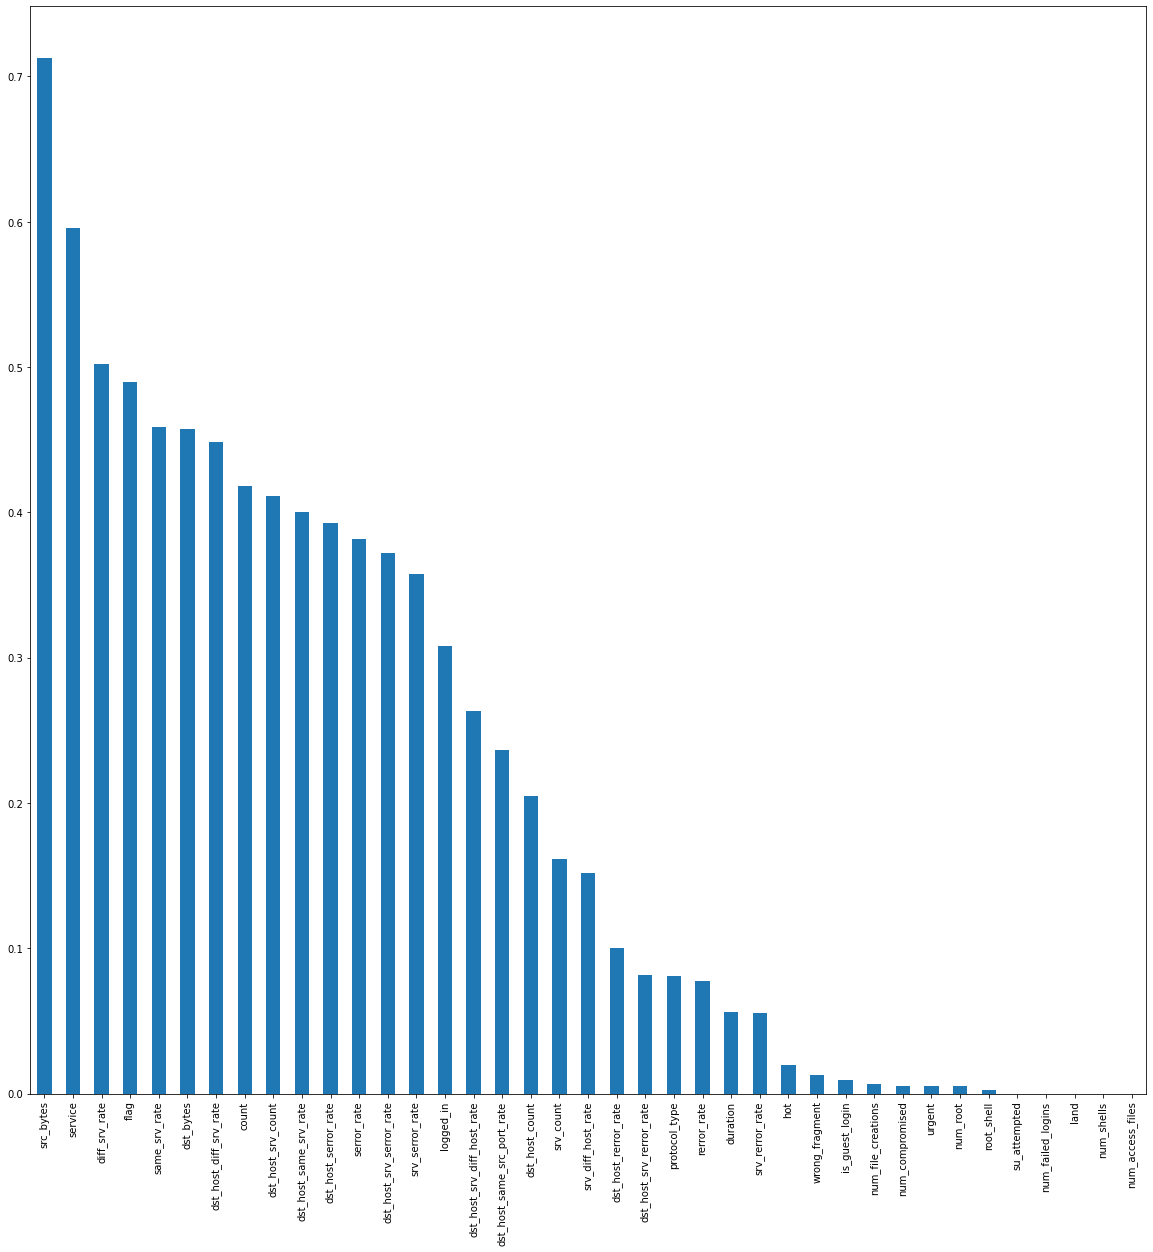

In [189]:
#plotting the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 20))

In [190]:
from sklearn.feature_selection import SelectKBest

In [191]:
#No we Will select the  top 20 important features
sel_cols = SelectKBest(mutual_info_classif, k=35)
sel_cols.fit(X_training_vth, Y_training)
imp_cols=X_training_vth.columns[sel_cols.get_support()]

In [192]:
imp_cols

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'su_attempted', 'num_file_creations',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [193]:
X_training_minfo=X_training_vth[imp_cols]

In [80]:
X_training_minfo

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,logged_in,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,19,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,41,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,46,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,22,9,232,8153,0,0,0,1,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,22,9,199,420,0,0,0,1,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,16,2,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
25188,0,1,19,9,334,0,0,0,0,1,...,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
25189,0,1,46,1,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
25190,0,1,38,5,0,0,0,0,0,0,...,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [81]:
X_testing_minfo=X_testing_vth[imp_cols]

In [82]:
X_testing_minfo

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,logged_in,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,13,1,57,9,118,2425,0,0,0,1,...,26,10,0.38,0.12,0.04,0.00,0.00,0.00,0.12,0.30
1,0,2,46,9,44,0,0,0,0,0,...,255,254,1.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00
2,0,1,57,8,0,44,0,0,0,0,...,255,79,0.31,0.61,0.00,0.00,0.21,0.68,0.60,0.00
3,0,2,46,9,53,55,0,0,0,0,...,255,255,1.00,0.00,0.87,0.00,0.00,0.00,0.00,0.00
4,0,1,46,10,0,0,0,0,0,0,...,16,1,0.06,1.00,1.00,0.00,1.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11845,0,2,11,9,43,43,0,0,0,0,...,255,255,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00
11846,0,1,22,9,336,285,0,0,0,1,...,255,234,0.92,0.02,0.00,0.00,0.00,0.00,0.05,0.00
11847,1,1,57,2,0,15,0,0,0,0,...,177,96,0.37,0.03,0.01,0.02,0.05,0.08,0.85,0.58
11848,0,1,54,1,0,0,0,0,0,0,...,171,52,0.19,0.03,0.01,0.04,0.00,0.00,0.88,1.00


## Standardization on feature selected -using sklearn 

In [83]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

In [84]:
# copy of datasets
X_training_stand = X_training_minfo.copy()
#X_train_stand = X_train.copy()

X_testing_stand = X_testing_minfo.copy()
#X_test_stand = X_test.copy()



In [85]:
# numerical features

num_cols = ['duration','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',
'num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
'dst_host_srv_rerror_rate']



In [86]:
# apply standardization on numerical features
for i in imp_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_training_stand[[i]])
    #scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_training_stand[i] = scale.transform(X_training_stand[[i]])
    #X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_testing_stand[i] = scale.transform(X_testing_stand[[i]])
    #X_test_stand[i] = scale.transform(X_test_stand[[i]])
    

In [87]:
X_training_stand
#X_train_stand


,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,logged_in,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.113551,-0.126061,-0.644558,0.753021,-0.009889,-0.039310,-0.091223,-0.091933,-0.02622,-0.807626,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,-0.113551,2.215916,0.763337,0.753021,-0.010032,-0.039310,-0.091223,-0.091933,-0.02622,-0.807626,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,-0.113551,-0.126061,1.083313,-0.739924,-0.010093,-0.039310,-0.091223,-0.091933,-0.02622,-0.807626,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,-0.113551,-0.126061,-0.452572,0.753021,-0.009996,0.052473,-0.091223,-0.091933,-0.02622,1.238197,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,-0.113551,-0.126061,-0.452572,0.753021,-0.010010,-0.034582,-0.091223,-0.091933,-0.02622,1.238197,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,-0.113551,-0.126061,-0.836544,-1.859633,-0.010093,-0.039310,-0.091223,-0.091933,-0.02622,-0.807626,...,0.732059,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25188,-0.113551,-0.126061,-0.644558,0.753021,-0.009954,-0.039310,-0.091223,-0.091933,-0.02622,1.238197,...,-1.833807,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281
25189,-0.113551,-0.126061,1.083313,-2.232869,-0.010093,-0.039310,-0.091223,-0.091933,-0.02622,-0.807626,...,0.732059,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25190,-0.113551,-0.126061,0.571352,-0.739924,-0.010093,-0.039310,-0.091223,-0.091933,-0.02622,-0.807626,...,0.732059,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281


In [88]:
X_testing_stand
#X_test_stand


,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,logged_in,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.108712,-0.126061,1.787261,0.753021,-0.010044,-0.012010,-0.091223,-0.091933,-0.02622,1.238197,...,-1.581261,-0.949554,-0.311383,0.200128,-0.348465,-0.287993,-0.641804,-0.627365,0.007192,0.571116
1,-0.113551,2.215916,1.083313,0.753021,-0.010074,-0.039310,-0.091223,-0.091933,-0.02622,-0.807626,...,0.732059,1.255704,1.069663,-0.387518,-0.445754,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,-0.113551,-0.126061,1.787261,0.379785,-0.010093,-0.038814,-0.091223,-0.091933,-0.02622,-0.807626,...,0.732059,-0.325936,-0.467308,2.817826,-0.478183,-0.287993,-0.170220,0.897072,1.576522,-0.374281
3,-0.113551,2.215916,1.083313,0.753021,-0.010071,-0.038691,-0.091223,-0.091933,-0.02622,-0.807626,...,0.732059,1.264742,1.069663,-0.440940,2.343190,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
4,-0.113551,-0.126061,1.083313,1.126257,-0.010093,-0.039310,-0.091223,-0.091933,-0.02622,-0.807626,...,-1.682279,-1.030895,-1.024181,4.901299,2.764775,-0.287993,1.603834,1.614454,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11845,-0.113551,2.215916,-1.156520,0.753021,-0.010075,-0.038826,-0.091223,-0.091933,-0.02622,-0.807626,...,0.732059,1.264742,1.069663,-0.440940,-0.445754,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
11846,-0.113551,-0.126061,-0.452572,0.753021,-0.009953,-0.036101,-0.091223,-0.091933,-0.02622,1.238197,...,0.732059,1.074945,0.891464,-0.334096,-0.478183,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
11847,-0.113178,-0.126061,1.787261,-1.859633,-0.010093,-0.039141,-0.091223,-0.091933,-0.02622,-0.807626,...,-0.055884,-0.172291,-0.333658,-0.280673,-0.445754,-0.107117,-0.529522,-0.448019,2.393881,1.453486
11848,-0.113551,-0.126061,1.595275,-2.232869,-0.010093,-0.039310,-0.091223,-0.091933,-0.02622,-0.807626,...,-0.116495,-0.569960,-0.734607,-0.280673,-0.445754,0.073759,-0.641804,-0.627365,2.491964,2.777041


##  SVM  after feature selection then standardization

In [89]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [90]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_training_stand, Y_training)
#rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_training_norm, Y_training)

#poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_training_stand, Y_training)

In [91]:
rbf_pred = rbf.predict(X_testing_stand)
#rbf_pred = rbf.predict(X_test_norm)

#poly_pred = poly.predict(X_testing_stand)

In [92]:
#metrics.accuracy_score(Y_testing,rbf_pred)
metrics.accuracy_score(Y_testing,rbf_pred)


0.4486075949367089

In [93]:
#metrics.precision_recall_fscore_support(Y_testing,rbf_pred, average='weighted')
metrics.precision_recall_fscore_support(Y_testing,rbf_pred, average='weighted')


c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8325885863378563, 0.4486075949367089, 0.43494768775003106, None)

In [135]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [140]:
model = LogisticRegression(max_iter=1200000)

In [141]:
rfe = RFE(model, 30)
rfe = rfe.fit(X_training, Y_training)

c:\python 3.9\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=30 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


KeyboardInterrupt: 